# Modeling Visit Frequency in Network

Below is an example of tracking the number of numbers each node is visited in a randomly generated graph.

In [28]:

from mesa import Agent, Model
from mesa.time import SimultaneousActivation
import networkx as nx
import numpy as np

class NetworkAgent(Agent):
    """Agent traverses network as model"""
    def __init__(self, unique_id, model, node=None):
        super().__init__(unique_id=unique_id, model=model)
        self.node = node
    
    def step(self):
        """Move to random neighbor on each step"""
        node =  [n for n in self.network][np.random.randint(0, len(G.nodes))]
        
class NetworkModel(Model):
    """Model resembling a graph/network"""
    def __init__(self, network):
        self.network = network
        self.schedule = SimultaneousActivation(model=self)
        
        # adding agents
        for i in range(10):
            agent = NetworkAgent(unique_id=i, model=self, node=list(self.network)[0])
            self.schedule.add(agent=agent)
            
    def step(self):
        """Advance model by one step"""
        self.schedule.step()


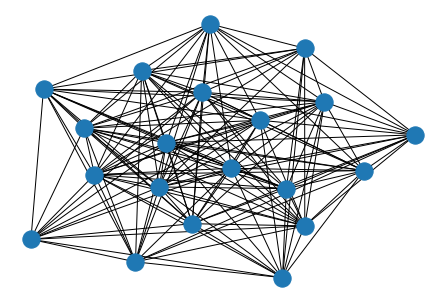

AttributeError: 'NetworkAgent' object has no attribute 'network'

In [29]:

import matplotlib.pyplot as plt
import networkx as nx
from networkx.generators.random_graphs import fast_gnp_random_graph
import numpy as np
%matplotlib inline

G = nx.fast_gnp_random_graph(n=20, p=0.8, seed=np.random.randint(0, 1000))
nx.draw(G=G)
plt.show()

nodes_visited = []

model = NetworkModel(network=G)
for i in range(10):
    model.step()
